# ALY6980 Capstone Project
# Team4

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from matplotlib import rcParams

rcParams['figure.figsize'] = (12,6)

import nltk

In [63]:
df=pd.read_csv('AllTagged.csv')

In [64]:
df.head()

,ID,AuthorID,Author,Date,Content,Words,"Change in appetite, losing or gaining weight",Sleeping too much or not sleeping well (insomnia),Fatigue and low energy most days,"Feeling worthless, guilty, and hopeless","An inability to focus and concentrate that may interfere with daily tasks at home, work, or school",Movements that are unusually slow or agitated (a change which is often noticeable to others),Thinking about death and dying; suicidal ideation or suicide attempts,None
0,1,4.560000e+17,Deleted User#0000,43630.77639,**List of International Suicide Hotlines**\n``...,72,N,N,N,N,N,N,N,Y
1,2,4.560000e+17,Deleted User#0000,43630.78611,"Hello, if you're depressed, being self-depreca...",56,N,N,N,Y,N,N,Y,N
2,3,4.680000e+17,angel?#5373,43630.84306,Please note that we are not professionals. Th...,61,N,N,N,N,N,N,N,Y
3,4,5.450000e+17,Sease#2410,43630.84514,yeah and people who just want attention don't ...,36,N,N,N,N,N,N,N,Y
4,5,3.030000e+17,Emma/Blue#2035,43630.85347,Just a small vent my arm hurts so much i know ...,41,N,N,N,Y,Y,Y,N,N


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23994 entries, 0 to 23993
Data columns (total 14 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   ID                                                                                                  23994 non-null  int64  
 1   AuthorID                                                                                            23994 non-null  float64
 2   Author                                                                                              23994 non-null  object 
 3   Date                                                                                                23994 non-null  object 
 4   Content                                                                                             23994 non-nu

In [66]:
df=df.dropna()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23978 entries, 0 to 23993
Data columns (total 14 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   ID                                                                                                  23978 non-null  int64  
 1   AuthorID                                                                                            23978 non-null  float64
 2   Author                                                                                              23978 non-null  object 
 3   Date                                                                                                23978 non-null  object 
 4   Content                                                                                             23978 non-nu

In [68]:
#rename column
df.rename(columns={"Change in appetite, losing or gaining weight": "symp_one", "Sleeping too much or not sleeping well (insomnia)": "symp_two",
                  "Fatigue and low energy most days":'symp_three','Feeling worthless, guilty, and hopeless':'symp_four',
                  'An inability to focus and concentrate that may interfere with daily tasks at home, work, or school':'symp_five',
                  'Movements that are unusually slow or agitated (a change which is often noticeable to others)':'symp_six',
                  'Thinking about death and dying; suicidal ideation or suicide attempts':'symp_seven'},inplace=True)

In [69]:
df.head()

,ID,AuthorID,Author,Date,Content,Words,symp_one,symp_two,symp_three,symp_four,symp_five,symp_six,symp_seven,None
0,1,4.560000e+17,Deleted User#0000,43630.77639,**List of International Suicide Hotlines**\n``...,72,N,N,N,N,N,N,N,Y
1,2,4.560000e+17,Deleted User#0000,43630.78611,"Hello, if you're depressed, being self-depreca...",56,N,N,N,Y,N,N,Y,N
2,3,4.680000e+17,angel?#5373,43630.84306,Please note that we are not professionals. Th...,61,N,N,N,N,N,N,N,Y
3,4,5.450000e+17,Sease#2410,43630.84514,yeah and people who just want attention don't ...,36,N,N,N,N,N,N,N,Y
4,5,3.030000e+17,Emma/Blue#2035,43630.85347,Just a small vent my arm hurts so much i know ...,41,N,N,N,Y,Y,Y,N,N


In [70]:
#df['None'].value_counts()

In [71]:
df["symp_one"].replace({"n": "N", "N ": "N",'Y ':'Y',' N':'N'}, inplace=True)

In [72]:
#df['symp_one'].value_counts()

In [73]:
#df['symp_two'].value_counts()

In [74]:
df["symp_two"].replace({"n": "N", "N ": "N",'Y ':'Y',' N':'N'}, inplace=True)

In [75]:
df["symp_three"].replace({"n": "N", "N ": "N",'Y ':'Y',' N':'N'}, inplace=True)

In [76]:
df["symp_five"].replace({"n": "N", "N ": "N",'Y ':'Y',' N':'N'}, inplace=True)

In [77]:
df["symp_six"].replace({"n": "N", "N ": "N",'Y ':'Y',' N':'N'}, inplace=True)

In [78]:
df["symp_seven"].replace({"n": "N", "N ": "N",'Y ':'Y',' N':'N','y':'Y','NN':'N'}, inplace=True)

In [79]:
df["None"].replace({"n": "N", "N ": "N",'Y ':'Y',' N':'N','y':'Y','NN':'N'}, inplace=True)

In [80]:
df['None'].value_counts()

Y    16911
N     7067
Name: None, dtype: int64

In [81]:
#the count of Y of each symp
symp_Y_count=[]
for i in range(6,13):
    symp_Y_count.append(df.iloc[:,i] .value_counts()['Y'])
symp_Y_count

[446, 446, 1019, 4060, 2029, 590, 1008]

In [82]:
data=[['symp_one',446], ['symp_two',446],['symp_three',1019],['symp_four',4061],
                             ['symp_five',2029],['symp_six',590], ['symp_seven',1008]]

In [83]:
df_symp_Y_count = pd.DataFrame(data, columns=['symp_name','symp_count'])

In [84]:
df_symp_Y_count

,symp_name,symp_count
0,symp_one,446
1,symp_two,446
2,symp_three,1019
3,symp_four,4061
4,symp_five,2029
5,symp_six,590
6,symp_seven,1008


In [85]:
# symp to one column

In [86]:
df.head()

,ID,AuthorID,Author,Date,Content,Words,symp_one,symp_two,symp_three,symp_four,symp_five,symp_six,symp_seven,None
0,1,4.560000e+17,Deleted User#0000,43630.77639,**List of International Suicide Hotlines**\n``...,72,N,N,N,N,N,N,N,Y
1,2,4.560000e+17,Deleted User#0000,43630.78611,"Hello, if you're depressed, being self-depreca...",56,N,N,N,Y,N,N,Y,N
2,3,4.680000e+17,angel?#5373,43630.84306,Please note that we are not professionals. Th...,61,N,N,N,N,N,N,N,Y
3,4,5.450000e+17,Sease#2410,43630.84514,yeah and people who just want attention don't ...,36,N,N,N,N,N,N,N,Y
4,5,3.030000e+17,Emma/Blue#2035,43630.85347,Just a small vent my arm hurts so much i know ...,41,N,N,N,Y,Y,Y,N,N


In [87]:
####transform the dataframe

In [88]:
df_symp_one_Y = df[df['symp_one']=='Y'][['ID','Content','symp_one']]
df_symp_one_Y=df_symp_one_Y.rename(columns={'symp_one':'symp'})
df_symp_one_Y["symp"].replace({"Y": '1'}, inplace=True)

In [89]:
df_symp_two_Y = df[df['symp_two']=='Y'][['ID','Content','symp_two']]
df_symp_two_Y=df_symp_two_Y.rename(columns={'symp_two':'symp'})
df_symp_two_Y["symp"].replace({"Y": '2'}, inplace=True)

In [90]:
df_symp_three_Y = df[df['symp_three']=='Y'][['ID','Content','symp_three']]
df_symp_three_Y=df_symp_three_Y.rename(columns={'symp_three':'symp'})
df_symp_three_Y["symp"].replace({"Y": '3'}, inplace=True)

In [91]:
df_symp_four_Y = df[df['symp_four']=='Y'][['ID','Content','symp_four']]
df_symp_four_Y=df_symp_four_Y.rename(columns={'symp_four':'symp'})
df_symp_four_Y["symp"].replace({"Y": '4'}, inplace=True)

In [92]:
df_symp_five_Y = df[df['symp_five']=='Y'][['ID','Content','symp_five']]
df_symp_five_Y=df_symp_five_Y.rename(columns={'symp_five':'symp'})
df_symp_five_Y["symp"].replace({"Y": '5'}, inplace=True)

In [93]:
df_symp_six_Y = df[df['symp_six']=='Y'][['ID','Content','symp_six']]
df_symp_six_Y=df_symp_six_Y.rename(columns={'symp_six':'symp'})
df_symp_six_Y["symp"].replace({"Y": '6'}, inplace=True)

In [94]:
df_symp_seven_Y = df[df['symp_seven']=='Y'][['ID','Content','symp_seven']]
df_symp_seven_Y=df_symp_seven_Y.rename(columns={'symp_seven':'symp'})
df_symp_seven_Y["symp"].replace({"Y": '7'}, inplace=True)

In [95]:
df_symp_None_Y = df[df['None']=='Y'][['ID','Content','None']]
df_symp_None_Y=df_symp_None_Y.rename(columns={'None':'symp'})
df_symp_None_Y["symp"].replace({"Y": '0'}, inplace=True)

In [96]:
df_symp_None_Y.head()

,ID,Content,symp
0,1,**List of International Suicide Hotlines**\n``...,0
2,3,Please note that we are not professionals. Th...,0
3,4,yeah and people who just want attention don't ...,0
5,6,They do where I live I had to call 911 before ...,0
6,7,I don‚Äôt want to seem like I‚Äôm saying no to...,0


In [97]:
df_trans=pd.concat([df_symp_one_Y,df_symp_two_Y,df_symp_three_Y, df_symp_four_Y, df_symp_five_Y,df_symp_six_Y ,
                   df_symp_seven_Y, df_symp_None_Y], ignore_index=True)

In [98]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26509 entries, 0 to 26508
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       26509 non-null  int64 
 1   Content  26509 non-null  object
 2   symp     26509 non-null  object
dtypes: int64(1), object(2)
memory usage: 621.4+ KB


In [99]:
df_trans.head()

,ID,Content,symp
0,22,‚ÄúI HAVE BEEN IN THIS KITCHEN WHILE YOU WERE ...,1
1,123,@Care üíï I've been awake for three sleepless...,1
2,124,"Anxiety, stress, and depression are some of th...",1
3,125,online quizzes are crap in my opinion you dont...,1
4,129,Well in my opinion my anxiety tries to keep up...,1


In [100]:
df_trans.to_excel('data_set_3.xlsx')

#df.to_excel('data_set_3.xlsx')

# Visualiazation

Text(0.5, 1.0, 'The number of each symptom ')

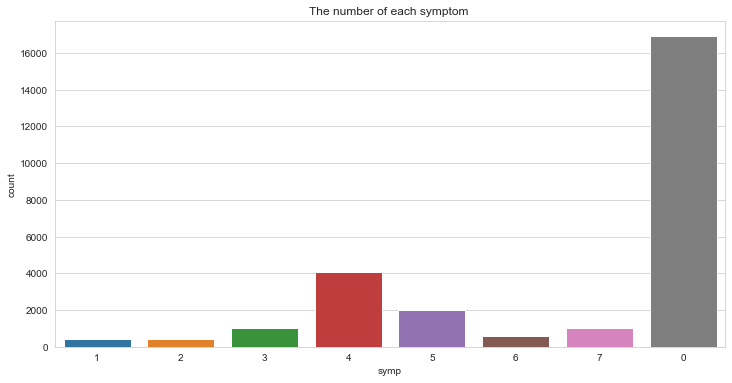

In [101]:
import seaborn as sns
sns.countplot(x="symp", data=df_trans)
plt.title('The number of each symptom ')

In [334]:
#count of each symp
#sns.barplot(x='symp_name',y='symp_count', data= df_symp_Y_count)

In [103]:
#count of None(Y/N)

#sns.countplot(x="None", data=df)

In [104]:
# add a new column, the length of the content column
df_trans['length']=df_trans['Content'].apply(len)

In [105]:
df_trans.head()

,ID,Content,symp,length
0,22,‚ÄúI HAVE BEEN IN THIS KITCHEN WHILE YOU WERE ...,1,100
1,123,@Care üíï I've been awake for three sleepless...,1,209
2,124,"Anxiety, stress, and depression are some of th...",1,281
3,125,online quizzes are crap in my opinion you dont...,1,1018
4,129,Well in my opinion my anxiety tries to keep up...,1,232


Text(0.5, 1.0, 'The distribution of text length')

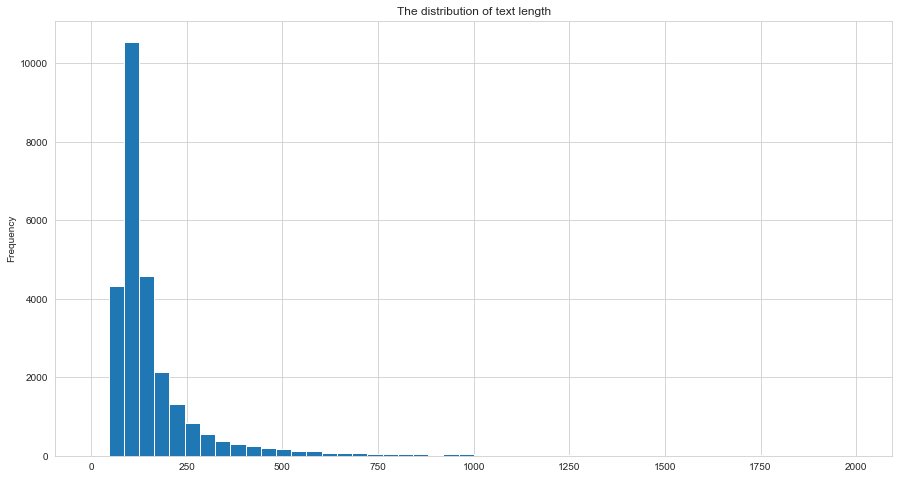

In [335]:
#distribution of length
df_trans['length'].plot.hist(bins=50)
plt.title('The distribution of text length')

In [107]:
df_trans['length'].describe()

count    26509.000000
mean       167.884115
std        165.661178
min          6.000000
25%         92.000000
50%        116.000000
75%        171.000000
max       1995.000000
Name: length, dtype: float64

In [108]:
df_trans[df_trans['length']==1995]

,ID,Content,symp,length
1956,205,I have come to a conclusion everyone that was ...,4,1995
5989,205,I have come to a conclusion everyone that was ...,5,1995


In [109]:
#df_trans.iloc[1956]['Content']

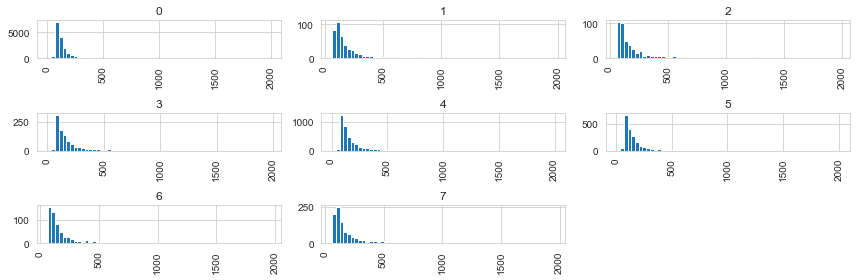

In [338]:
# The distribution of text length of each symptom
df_trans.hist(column='length',by='symp',bins=60, figsize=(12,4))
plt.tight_layout()


<AxesSubplot:xlabel='symp', ylabel='length'>

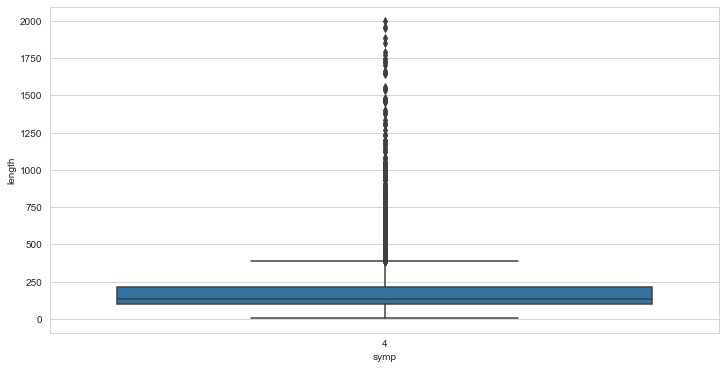

In [111]:
# symp_four length distribution
sns.boxplot(x='symp',y='length',data=df_trans[df_trans['symp']=='4'])

In [112]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26509 entries, 0 to 26508
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       26509 non-null  int64 
 1   Content  26509 non-null  object
 2   symp     26509 non-null  object
 3   length   26509 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 828.5+ KB


# data preprocessing ( only remove punc)

In [113]:
# remove punc, return list of clean words
import string

def text_process_simple(cont):
    nopunc=[char for char in cont if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return[word for word in nopunc.split()]

In [114]:
#add the tokenized content column to the dataframe
df_trans['simple_process']=df_trans['Content'].apply(text_process_simple)

In [115]:
df_trans.head()

,ID,Content,symp,length,simple_process
0,22,‚ÄúI HAVE BEEN IN THIS KITCHEN WHILE YOU WERE ...,1,100,"[‚ÄúI, HAVE, BEEN, IN, THIS, KITCHEN, WHILE, Y..."
1,123,@Care üíï I've been awake for three sleepless...,1,209,"[Care, üíï, Ive, been, awake, for, three, sle..."
2,124,"Anxiety, stress, and depression are some of th...",1,281,"[Anxiety, stress, and, depression, are, some, ..."
3,125,online quizzes are crap in my opinion you dont...,1,1018,"[online, quizzes, are, crap, in, my, opinion, ..."
4,129,Well in my opinion my anxiety tries to keep up...,1,232,"[Well, in, my, opinion, my, anxiety, tries, to..."


find the most common words of symp4

In [116]:
from collections import Counter

In [117]:
#symp_four
symp_four_simple=[]
for i in range (0,len(df_trans[df_trans['symp']=='4'])):
    symp_four_simple.append(df_trans[df_trans['symp']=='4'].iloc[i]['simple_process'])

In [118]:
flat_list_4_simple = []
for sublist in symp_four_simple:
    for item in sublist:
        flat_list_4_simple.append(item)

In [119]:
word_count_symp4_simple = Counter(flat_list_4_simple)

In [120]:
symp4_most_common_20_simple = word_count_symp4_simple.most_common(20)

In [121]:
df_symp4_most_common_20_simple = pd.DataFrame(symp4_most_common_20_simple, columns =['word', 'count'])

In [122]:
df_symp4_most_common_20_simple

,word,count
0,I,5621
1,to,5454
2,and,5266
3,i,3336
4,the,2673
5,a,2595
6,my,2537
7,me,2417
8,it,2326
9,that,2037


When we did a simple data precessing, we found that 19 0f the 20 top20 commone used words of symp4 are stop words. So we should reomve the stop words before study the most common used words.

# build machine learning models with the simple processed data

<AxesSubplot:xlabel='symp', ylabel='count'>

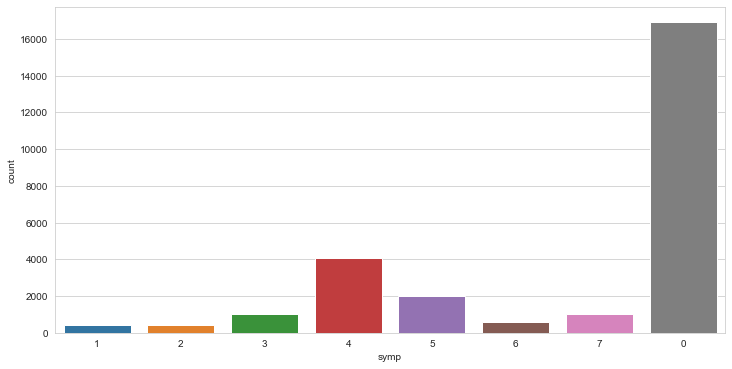

In [123]:
sns.countplot(x="symp", data=df_trans)

In [124]:
nodep = df_trans[df_trans['symp']=='0']
symp_one = df_trans[df_trans['symp']=='1']

In [259]:
nodep

,ID,Content,symp,length,simple_process
9598,1,**List of International Suicide Hotlines**\n``...,0,905,"[List, of, International, Suicide, Hotlines, A..."
9599,3,Please note that we are not professionals. Th...,0,297,"[Please, note, that, we, are, not, professiona..."
9600,4,yeah and people who just want attention don't ...,0,194,"[yeah, and, people, who, just, want, attention..."
9601,6,They do where I live I had to call 911 before ...,0,86,"[They, do, where, I, live, I, had, to, call, 9..."
9602,7,I don‚Äôt want to seem like I‚Äôm saying no to...,0,111,"[I, don‚Äôt, want, to, seem, like, I‚Äôm, sayi..."
...,...,...,...,...,...
26504,23992,Hello everyone... seems like weird.. I just en...,0,505,"[Hello, everyone, seems, like, weird, I, just,..."
26505,23993,> So when you finish it you will feel happy\n@...,0,90,"[So, when, you, finish, it, you, will, feel, h..."
26506,23994,> @AfonsoHackers\n> \n> Omg you're just like m...,0,160,"[AfonsoHackers, Omg, youre, just, like, me, SA..."
26507,23995,> And it‚Äôs just getting so annoying and I‚Äô...,0,156,"[And, it‚Äôs, just, getting, so, annoying, and..."


In [126]:
print(nodep.shape,symp_one.shape)

(16911, 5) (446, 5)


imblanced dataset, we used the oversample method to make this dataset balance

In [127]:
#conda install -c glemaitre imbalanced-learn

In [260]:
df_trans.head(1)

,ID,Content,symp,length,simple_process,tokenized_Content,stemmed_Content,lemmatized_Content
0,22,‚ÄúI HAVE BEEN IN THIS KITCHEN WHILE YOU WERE ...,1,100,"[‚ÄúI, HAVE, BEEN, IN, THIS, KITCHEN, WHILE, Y...","[‚ÄúI, KITCHEN, PLACE, EATING, STOP, EATING, T...","[‚äúi, kitchen, place, eat, stop, eat, that, f...","[‚ÄúI, KITCHEN, PLACE, EATING, STOP, EATING, T..."


In [129]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26509 entries, 0 to 26508
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              26509 non-null  int64 
 1   Content         26509 non-null  object
 2   symp            26509 non-null  object
 3   length          26509 non-null  int64 
 4   simple_process  26509 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


In [130]:
X=df_trans[['Content','length']]
y=df_trans['symp']

In [261]:
X.columns

Index(['Content', 'length'], dtype='object')

In [132]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [133]:
ros=RandomOverSampler(random_state=0)
X_resampled,y_resampled = ros.fit_resample(X,y)

print(sorted(Counter(y_resampled).items()), y_resampled.shape)

[('0', 16911), ('1', 16911), ('2', 16911), ('3', 16911), ('4', 16911), ('5', 16911), ('6', 16911), ('7', 16911)] (135288,)


In [262]:
y_resampled

0         1
1         1
2         1
3         1
4         1
         ..
135283    7
135284    7
135285    7
135286    7
135287    7
Name: symp, Length: 135288, dtype: object

In [135]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135288 entries, 0 to 135287
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Content  135288 non-null  object
 1   length   135288 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


train-test-split

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
cont_train, cont_test, dep_train, dep_test = train_test_split(X_resampled['Content'], y_resampled, test_size=0.3)

Naive Bayes

In [138]:
from sklearn.naive_bayes import MultinomialNB

In [139]:
from sklearn.pipeline import Pipeline

In [511]:

pipeline_simple = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process_simple)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [512]:
pipeline_simple.fit(cont_train,dep_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process_simple at 0x7f830c1c7d30>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [513]:
predictions_simple = pipeline_simple.predict(cont_test)

In [265]:
from sklearn.metrics import classification_report

In [514]:
print(classification_report(dep_test,predictions_simple))

              precision    recall  f1-score   support

           0       0.64      0.45      0.53      5031
           1       0.76      0.84      0.80      5051
           2       0.70      0.88      0.78      5161
           3       0.58      0.67      0.63      5089
           4       0.57      0.41      0.48      5075
           5       0.60      0.52      0.56      5088
           6       0.71      0.77      0.74      4992
           7       0.69      0.76      0.72      5100

    accuracy                           0.66     40587
   macro avg       0.66      0.66      0.65     40587
weighted avg       0.66      0.66      0.65     40587



RandomForest

In [266]:
from sklearn.ensemble import RandomForestClassifier

In [515]:
pipeline_simple_2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process_simple)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [516]:
pipeline_simple_2.fit(cont_train,dep_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process_simple at 0x7f830c1c7d30>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [517]:
predictions_simple_2 = pipeline_simple_2.predict(cont_test)

In [518]:
print(classification_report(dep_test,predictions_simple_2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5031
           1       0.79      0.93      0.86      5051
           2       0.78      0.94      0.85      5161
           3       0.76      0.77      0.76      5089
           4       0.94      0.62      0.75      5075
           5       0.80      0.67      0.73      5088
           6       0.80      0.92      0.86      4992
           7       0.87      0.81      0.84      5100

    accuracy                           0.83     40587
   macro avg       0.84      0.83      0.83     40587
weighted avg       0.84      0.83      0.83     40587



SVC

In [279]:
from sklearn.svm import SVC

In [280]:
pipeline_simple_3 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process_simple)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVC
])

In [281]:
pipeline_simple_3.fit(cont_train,dep_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process_simple at 0x7fc94781fc10>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [282]:
predictions_simple_3 = pipeline_simple_3.predict(cont_test)

In [283]:
print(classification_report(dep_test,predictions_simple_3))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      5090
           1       0.79      0.92      0.85      5049
           2       0.76      0.94      0.84      5060
           3       0.77      0.76      0.76      5071
           4       0.82      0.61      0.70      5023
           5       0.80      0.66      0.72      5138
           6       0.81      0.91      0.86      5007
           7       0.86      0.82      0.84      5149

    accuracy                           0.82     40587
   macro avg       0.82      0.82      0.81     40587
weighted avg       0.82      0.82      0.81     40587



In [ ]:
#Random forest algorithm has the highest accuracy, next I will use Grid Search to find the best parameter

In [ ]:
# resampled data simple text process & TFIDF

In [314]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [315]:
tfidf_vect=TfidfVectorizer(analyzer=text_process_simple)

In [316]:
X_tfidf=tfidf_vect.fit_transform(X_resampled['Content'])

In [317]:
print(X_tfidf.shape)

(135288, 20392)


In [319]:
#print(tfidf_vect.get_feature_names())

In [320]:
param={'n_estimators':[10,150,300], 'max_depth':[30,60,90,None]}

In [321]:
from sklearn.model_selection import GridSearchCV

In [322]:
gs=GridSearchCV(RandomForestClassifier(),param,cv=5, n_jobs= -1)

In [323]:
gs_fit=gs.fit(X_tfidf,y_resampled)

/Users/qianna/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [324]:
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,5069.766990,99.088021,7.760105,1.459524,None,300,"{'max_depth': None, 'n_estimators': 300}",0.830734,0.835058,0.842265,0.838489,0.837861,0.836881,0.003838,1
10,2988.757562,89.251829,4.877026,0.203088,None,150,"{'max_depth': None, 'n_estimators': 150}",0.829958,0.835058,0.841895,0.838452,0.837639,0.836600,0.003976,2
8,3786.875639,74.055601,6.499591,0.158549,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.825966,0.829477,0.837867,0.833241,0.831541,0.831618,0.003955,3
7,2041.204117,52.606764,3.846641,0.309171,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.825893,0.829256,0.837054,0.833426,0.831393,0.831404,0.003768,4
9,196.790552,7.002376,0.410714,0.120714,None,10,"{'max_depth': None, 'n_estimators': 10}",0.824156,0.827851,0.835575,0.830284,0.829212,0.829416,0.003711,5


In [ ]:
# max_depth = None, n_estimators = 300 gave the highest mean test score

In [ ]:
# best parameters & cross validation

In [325]:
from sklearn.model_selection import cross_val_predict

In [326]:
pipeline_simple_rf_estimator = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process_simple)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier(n_estimators=300)),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [327]:
rf_estimator_fit=pipeline_simple_rf_estimator.fit(cont_train,dep_train)

In [328]:
rf_estimator_predicted=cross_val_predict(rf_estimator_fit,X_resampled['Content'], y_resampled,cv=5)

In [330]:
rf_estimator_predicted

array(['1', '1', '1', ..., '7', '7', '3'], dtype=object)

In [332]:
print(classification_report(y_resampled,rf_estimator_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16911
           1       0.79      0.93      0.85     16911
           2       0.76      0.94      0.84     16911
           3       0.77      0.78      0.77     16911
           4       0.95      0.64      0.77     16911
           5       0.82      0.68      0.74     16911
           6       0.81      0.92      0.86     16911
           7       0.87      0.81      0.84     16911

    accuracy                           0.84    135288
   macro avg       0.84      0.84      0.83    135288
weighted avg       0.84      0.84      0.83    135288



# data preprocessing

In [142]:
# remove punc, reomve stopwords, return list of clean words
import string
from nltk.corpus import stopwords

def text_process(cont):
    nopunc=[char for char in cont if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [143]:
#add the tokenized content column to the dataframe
df_trans['tokenized_Content']=df_trans['Content'].apply(text_process)

In [144]:
df_trans.head()

,ID,Content,symp,length,simple_process,tokenized_Content
0,22,‚ÄúI HAVE BEEN IN THIS KITCHEN WHILE YOU WERE ...,1,100,"[‚ÄúI, HAVE, BEEN, IN, THIS, KITCHEN, WHILE, Y...","[‚ÄúI, KITCHEN, PLACE, EATING, STOP, EATING, T..."
1,123,@Care üíï I've been awake for three sleepless...,1,209,"[Care, üíï, Ive, been, awake, for, three, sle...","[Care, üíï, Ive, awake, three, sleepless, nig..."
2,124,"Anxiety, stress, and depression are some of th...",1,281,"[Anxiety, stress, and, depression, are, some, ...","[Anxiety, stress, depression, common, causes, ..."
3,125,online quizzes are crap in my opinion you dont...,1,1018,"[online, quizzes, are, crap, in, my, opinion, ...","[online, quizzes, crap, opinion, dont, need, q..."
4,129,Well in my opinion my anxiety tries to keep up...,1,232,"[Well, in, my, opinion, my, anxiety, tries, to...","[Well, opinion, anxiety, tries, keep, whatever..."


In [145]:
#stemming

In [146]:
ps=nltk.PorterStemmer()

def stemming(tokenized_text):
    text=[ps.stem(word) for word in tokenized_text]
    return text
df_trans['stemmed_Content']=df_trans['tokenized_Content'].apply(stemming)

In [147]:
df_trans.head()

,ID,Content,symp,length,simple_process,tokenized_Content,stemmed_Content
0,22,‚ÄúI HAVE BEEN IN THIS KITCHEN WHILE YOU WERE ...,1,100,"[‚ÄúI, HAVE, BEEN, IN, THIS, KITCHEN, WHILE, Y...","[‚ÄúI, KITCHEN, PLACE, EATING, STOP, EATING, T...","[‚äúi, kitchen, place, eat, stop, eat, that, f..."
1,123,@Care üíï I've been awake for three sleepless...,1,209,"[Care, üíï, Ive, been, awake, for, three, sle...","[Care, üíï, Ive, awake, three, sleepless, nig...","[care, üíï, ive, awak, three, sleepless, nigh..."
2,124,"Anxiety, stress, and depression are some of th...",1,281,"[Anxiety, stress, and, depression, are, some, ...","[Anxiety, stress, depression, common, causes, ...","[anxieti, stress, depress, common, caus, chron..."
3,125,online quizzes are crap in my opinion you dont...,1,1018,"[online, quizzes, are, crap, in, my, opinion, ...","[online, quizzes, crap, opinion, dont, need, q...","[onlin, quizz, crap, opinion, dont, need, quiz..."
4,129,Well in my opinion my anxiety tries to keep up...,1,232,"[Well, in, my, opinion, my, anxiety, tries, to...","[Well, opinion, anxiety, tries, keep, whatever...","[well, opinion, anxieti, tri, keep, whatev, pe..."


In [148]:
# Lemmatizing

In [149]:
#nltk.download('wordnet')

In [150]:
wn=nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text=[wn.lemmatize(word) for word in tokenized_text]
    return text

df_trans['lemmatized_Content']=df_trans['tokenized_Content'].apply(lemmatizing)

In [151]:
df_trans.head()

,ID,Content,symp,length,simple_process,tokenized_Content,stemmed_Content,lemmatized_Content
0,22,‚ÄúI HAVE BEEN IN THIS KITCHEN WHILE YOU WERE ...,1,100,"[‚ÄúI, HAVE, BEEN, IN, THIS, KITCHEN, WHILE, Y...","[‚ÄúI, KITCHEN, PLACE, EATING, STOP, EATING, T...","[‚äúi, kitchen, place, eat, stop, eat, that, f...","[‚ÄúI, KITCHEN, PLACE, EATING, STOP, EATING, T..."
1,123,@Care üíï I've been awake for three sleepless...,1,209,"[Care, üíï, Ive, been, awake, for, three, sle...","[Care, üíï, Ive, awake, three, sleepless, nig...","[care, üíï, ive, awak, three, sleepless, nigh...","[Care, üíï, Ive, awake, three, sleepless, nig..."
2,124,"Anxiety, stress, and depression are some of th...",1,281,"[Anxiety, stress, and, depression, are, some, ...","[Anxiety, stress, depression, common, causes, ...","[anxieti, stress, depress, common, caus, chron...","[Anxiety, stress, depression, common, cause, c..."
3,125,online quizzes are crap in my opinion you dont...,1,1018,"[online, quizzes, are, crap, in, my, opinion, ...","[online, quizzes, crap, opinion, dont, need, q...","[onlin, quizz, crap, opinion, dont, need, quiz...","[online, quiz, crap, opinion, dont, need, quiz..."
4,129,Well in my opinion my anxiety tries to keep up...,1,232,"[Well, in, my, opinion, my, anxiety, tries, to...","[Well, opinion, anxiety, tries, keep, whatever...","[well, opinion, anxieti, tri, keep, whatev, pe...","[Well, opinion, anxiety, try, keep, whatever, ..."


In [165]:
df_trans['symp'].value_counts()

0    16911
4     4060
5     2029
3     1019
7     1008
6      590
1      446
2      446
Name: symp, dtype: int64

In [152]:
import string
from nltk.corpus import stopwords
wn=nltk.WordNetLemmatizer()

def text_process_1(cont):
    nopunc=[char for char in cont if char not in string.punctuation]
    nopunc=''.join(nopunc)
    no_stopword=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    wn=nltk.WordNetLemmatizer()
    text=[wn.lemmatize(word) for word in no_stopword]
    return text

In [153]:
#Vectorizing Data: Bag-Of-Words

In [308]:
from sklearn.feature_extraction.text import CountVectorizer

In [309]:
bow_transformer=CountVectorizer(analyzer=text_process_1).fit(df_trans['Content'])

In [310]:
print(len(bow_transformer.vocabulary_))

18520


In [311]:
content_bow=bow_transformer.transform(df_trans['Content'])

In [158]:
print(content_bow.shape)

(26509, 18520)


In [159]:
###TFIDF

In [160]:
from sklearn.feature_extraction.text import TfidfTransformer

In [161]:
tfidf_transformer = TfidfTransformer().fit(content_bow)

In [162]:
#tfidf4=tfidf_transformer.transform(bow4)

In [163]:
#print(tfidf4)

In [164]:
content_tfidf=tfidf_transformer.transform(content_bow)

In [374]:
#conda install wordcloud

# top20 common words of each symp

In [168]:
from collections import Counter

In [166]:
#symp_one
symp_one=[]
for i in range (0,len(df_trans[df_trans['symp']=='1'])):
    symp_one.append(df_trans[df_trans['symp']=='1'].iloc[i]['lemmatized_Content'])

In [169]:
# to flat list
flat_list_one = []
for sublist in symp_one:
    for item in sublist:
        flat_list_one.append(item)

In [172]:
symp1_most_common_20=Counter(flat_list_one).most_common(20)

In [173]:
symp1_most_common_20

[('like', 172),
 ('eat', 108),
 ('dont', 99),
 ('get', 93),
 ('feel', 89),
 ('Im', 84),
 ('thing', 82),
 ('know', 78),
 ('make', 72),
 ('want', 71),
 ('even', 67),
 ('im', 65),
 ('cant', 61),
 ('friend', 57),
 ('really', 56),
 ('time', 52),
 ('day', 50),
 ('great', 50),
 ('people', 47),
 ('help', 47)]

In [174]:
df_symp1_most_common_20 = pd.DataFrame(symp1_most_common_20, columns =['word', 'count'])

In [175]:
df_symp1_most_common_20

,word,count
0,like,172
1,eat,108
2,dont,99
3,get,93
4,feel,89
5,Im,84
6,thing,82
7,know,78
8,make,72
9,want,71


In [225]:
rcParams['figure.figsize'] = (15,8)

Text(0.5, 1.0, 'The top20 frequency words of symptoms one')

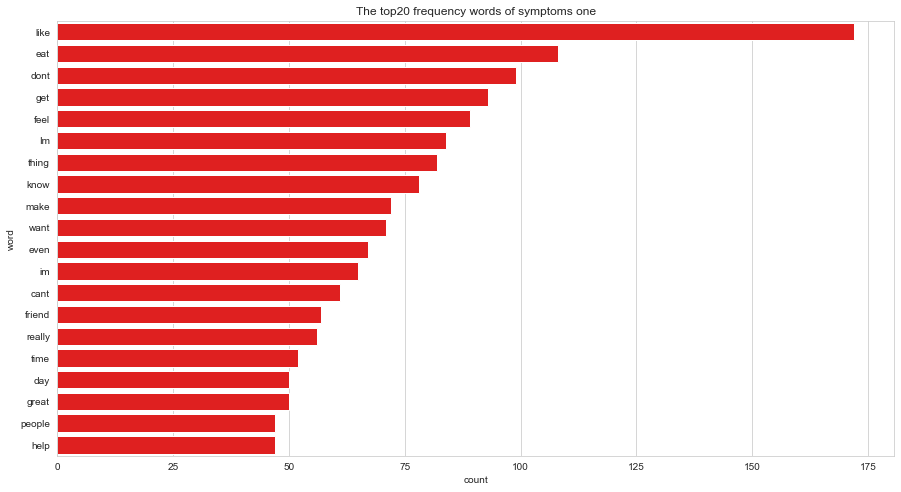

In [226]:
sns.barplot(x='count',y='word',data=df_symp1_most_common_20,color='red')
plt.title('The top20 frequency words of symptoms one')

In [ ]:
#symp_one
symp_one=[]
for i in range (0,len(df_trans[df_trans['symp']=='1'])):
    symp_one.append(df_trans[df_trans['symp']=='1'].iloc[i]['lemmatized_Content'])
    
# to flat list
flat_list_one = []
for sublist in symp_one:
    for item in sublist:
        flat_list_one.append(item)
        
symp1_most_common_20=Counter(flat_list_one).most_common(20)
df_symp1_most_common_20 = pd.DataFrame(symp1_most_common_20, columns =['word', 'count'])

In [199]:
#symp_two
symp_two=[]
for i in range (0,len(df_trans[df_trans['symp']=='2'])):
    symp_two.append(df_trans[df_trans['symp']=='2'].iloc[i]['lemmatized_Content'])

# to flat list
flat_list_two = []
for sublist in symp_two:
    for item in sublist:
        flat_list_two.append(item)

In [200]:
symp2_most_common_20=Counter(flat_list_two).most_common(20)
df_symp2_most_common_20 = pd.DataFrame(symp2_most_common_20, columns =['word', 'count'])
    

In [201]:
df_symp2_most_common_20 

,word,count
0,sleep,215
1,like,157
2,get,131
3,im,114
4,dont,103
5,day,99
6,Im,98
7,feel,94
8,cant,87
9,know,85


In [197]:
flat_list_two

Text(0.5, 1.0, 'The top20 frequency words of symptoms two')

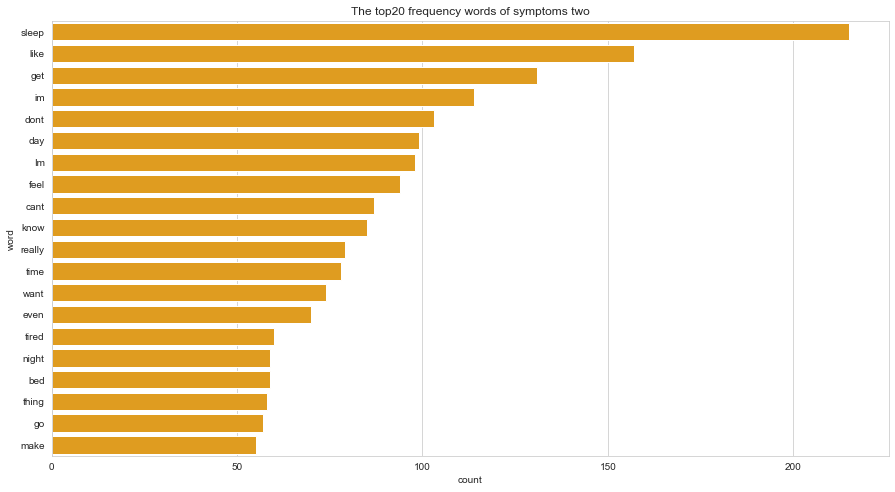

In [227]:
sns.barplot(x='count',y='word',data=df_symp2_most_common_20,color='orange')
plt.title('The top20 frequency words of symptoms two')

In [220]:
#symp_three
symp_three=[]
for i in range (0,len(df_trans[df_trans['symp']=='3'])):
    symp_three.append(df_trans[df_trans['symp']=='3'].iloc[i]['lemmatized_Content'])

# to flat list
flat_list_three = []
for sublist in symp_three:
    for item in sublist:
        flat_list_three.append(item)

In [222]:
symp3_most_common_20=Counter(flat_list_three).most_common(20)
df_symp3_most_common_20 = pd.DataFrame(symp3_most_common_20, columns =['word', 'count'])

In [297]:
df_symp3_most_common_20

,word,count
0,like,351
1,feel,311
2,dont,260
3,Im,231
4,get,225
5,im,213
6,want,181
7,know,176
8,thing,166
9,really,165


Text(0.5, 1.0, 'The top20 frequency words of symptoms three')

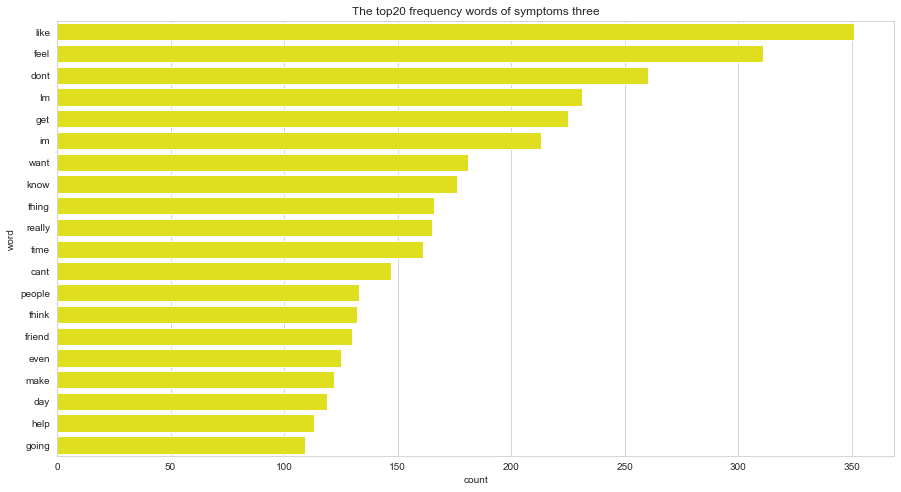

In [228]:
sns.barplot(x='count',y='word',data=df_symp3_most_common_20,color='yellow')
plt.title('The top20 frequency words of symptoms three')

In [231]:
#symp_four
symp_four=[]
for i in range (0,len(df_trans[df_trans['symp']=='4'])):
    symp_four.append(df_trans[df_trans['symp']=='4'].iloc[i]['lemmatized_Content'])

# to flat list
flat_list_four = []
for sublist in symp_four:
    for item in sublist:
        flat_list_four.append(item)

In [232]:
symp4_most_common_20=Counter(flat_list_four).most_common(20)
df_symp4_most_common_20 = pd.DataFrame(symp4_most_common_20, columns =['word', 'count'])

In [296]:
df_symp4_most_common_20

,word,count
0,like,1437
1,feel,1171
2,dont,1123
3,Im,919
4,get,804
5,know,783
6,im,781
7,want,774
8,really,750
9,friend,657


Text(0.5, 1.0, 'The top20 frequency words of symptoms four')

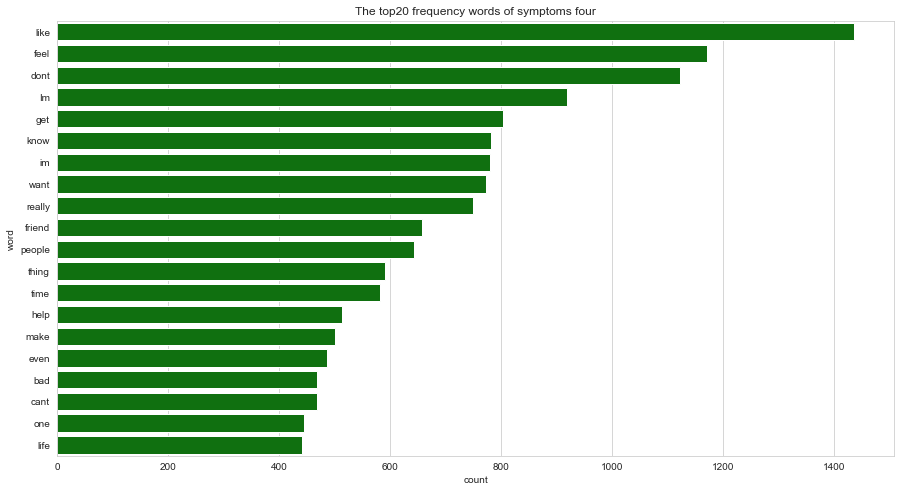

In [236]:
sns.barplot(x='count',y='word',data=df_symp4_most_common_20,color='green')
plt.title('The top20 frequency words of symptoms four')

In [234]:
#symp_five
symp_five=[]
for i in range (0,len(df_trans[df_trans['symp']=='5'])):
    symp_five.append(df_trans[df_trans['symp']=='5'].iloc[i]['lemmatized_Content'])

# to flat list
flat_list_five = []
for sublist in symp_five:
    for item in sublist:
        flat_list_five.append(item)

In [235]:
symp5_most_common_20=Counter(flat_list_five).most_common(20)
df_symp5_most_common_20 = pd.DataFrame(symp5_most_common_20, columns =['word', 'count'])

In [298]:
df_symp5_most_common_20 

,word,count
0,like,632
1,dont,499
2,know,382
3,get,363
4,im,363
5,really,358
6,Im,358
7,feel,355
8,friend,300
9,time,290


Text(0.5, 1.0, 'The top20 frequency words of symptoms five')

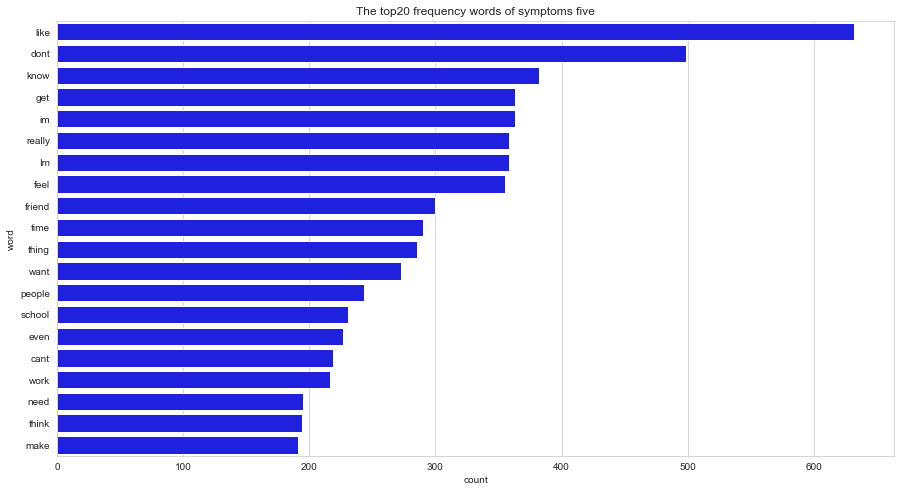

In [240]:
sns.barplot(x='count',y='word',data=df_symp5_most_common_20,color='blue')
plt.title('The top20 frequency words of symptoms five')

In [238]:
#symp_six
symp_six=[]
for i in range (0,len(df_trans[df_trans['symp']=='6'])):
    symp_six.append(df_trans[df_trans['symp']=='6'].iloc[i]['lemmatized_Content'])

# to flat list
flat_list_six = []
for sublist in symp_six:
    for item in sublist:
        flat_list_six.append(item)

In [241]:
symp6_most_common_20=Counter(flat_list_six).most_common(20)
df_symp6_most_common_20 = pd.DataFrame(symp6_most_common_20, columns =['word', 'count'])

In [299]:
df_symp6_most_common_20

,word,count
0,like,190
1,dont,147
2,get,134
3,know,111
4,people,110
5,feel,105
6,really,104
7,im,103
8,Im,102
9,want,98


Text(0.5, 1.0, 'The top20 frequency words of symptoms six')

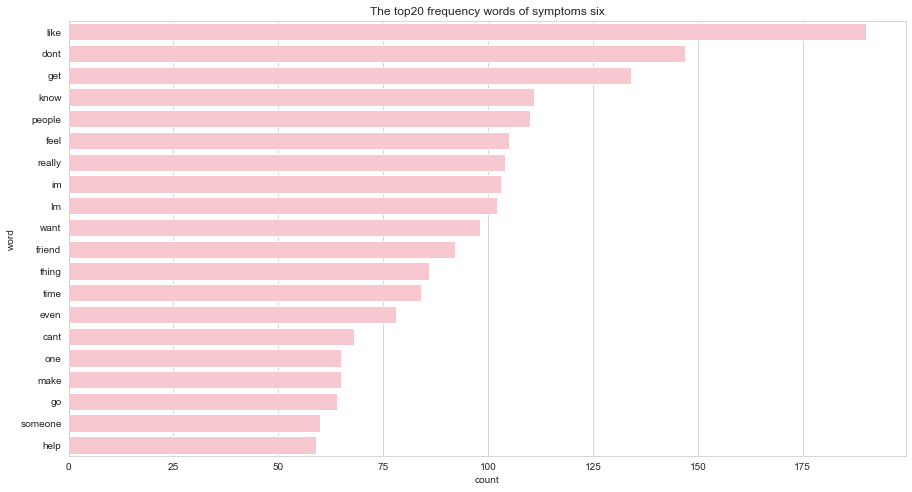

In [243]:
sns.barplot(x='count',y='word',data=df_symp6_most_common_20,color='pink')
plt.title('The top20 frequency words of symptoms six')

In [244]:
#symp_seven
symp_seven=[]
for i in range (0,len(df_trans[df_trans['symp']=='7'])):
    symp_seven.append(df_trans[df_trans['symp']=='7'].iloc[i]['lemmatized_Content'])

# to flat list
flat_list_seven = []
for sublist in symp_seven:
    for item in sublist:
        flat_list_seven.append(item)

In [245]:
symp7_most_common_20=Counter(flat_list_seven).most_common(20)
df_symp7_most_common_20 = pd.DataFrame(symp7_most_common_20, columns =['word', 'count'])

In [300]:
df_symp7_most_common_20

,word,count
0,like,332
1,dont,266
2,feel,251
3,want,231
4,Im,228
5,know,196
6,get,195
7,life,175
8,im,156
9,people,143


Text(0.5, 1.0, 'The top20 frequency words of symptoms seven')

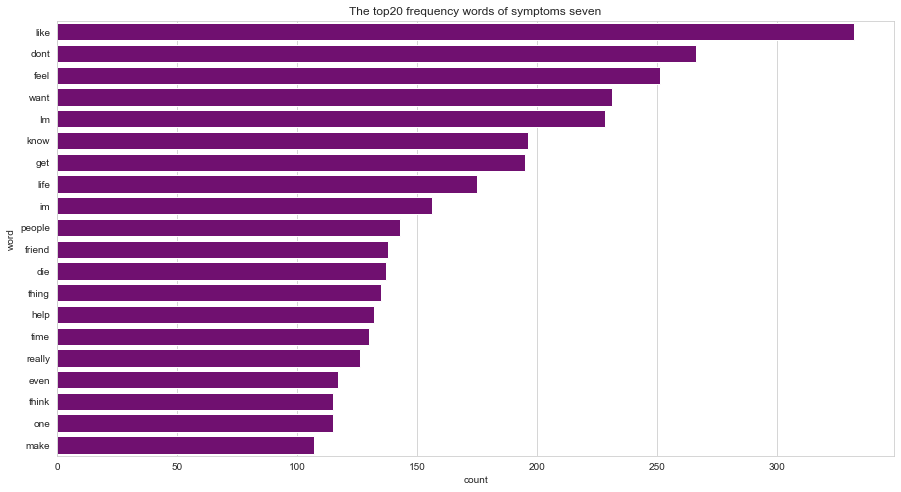

In [246]:
sns.barplot(x='count',y='word',data=df_symp7_most_common_20,color='purple')
plt.title('The top20 frequency words of symptoms seven')

wordcloud viz

In [247]:
# using list comprehension, make list to string

# symp1 

listToStr_1 = ' '.join([str(elem) for elem in flat_list_one])
  

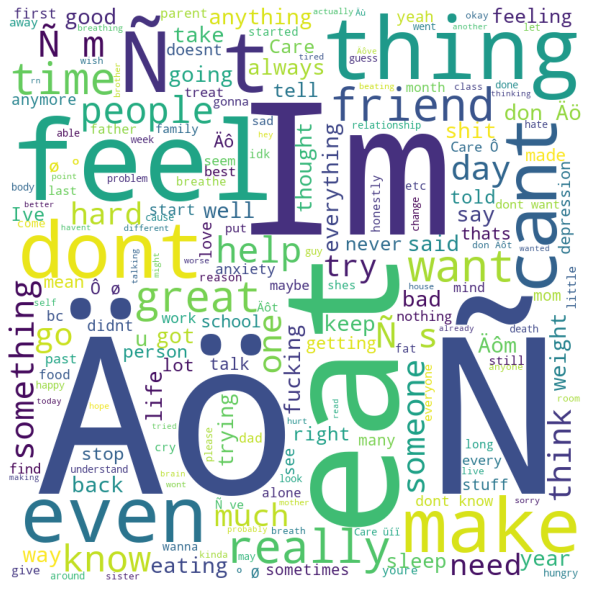

In [248]:
from wordcloud import WordCloud, STOPWORDS

wordcloud_symp1 = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(listToStr_1)
  

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [252]:
#depression symp
symp_dep=[]
for i in range (0,len(df_trans[df_trans['symp']!='0'])):
    symp_dep.append(df_trans[df_trans['symp']!='0'].iloc[i]['lemmatized_Content'])

In [253]:
len(symp_dep)

9598

In [254]:
# to flat list
flat_list_dep = []
for sublist in symp_dep:
    for item in sublist:
        flat_list_dep.append(item)

In [255]:

# using list comprehension, make list to string
listToStr_dep = ' '.join([str(elem) for elem in flat_list_dep])
  


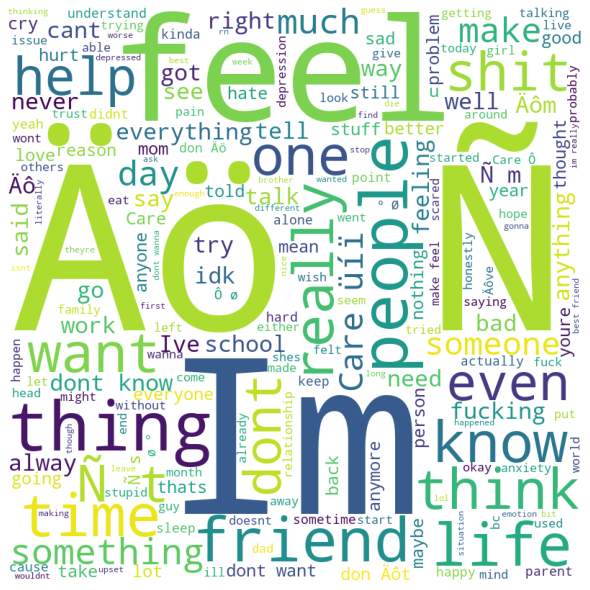

In [257]:

from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(listToStr_dep)
  

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()


# build classfication model

In [258]:
#sns.countplot(x="symp", data=df_trans)

In [420]:
#conda install -c glemaitre imbalanced-learn

In [442]:
### 1. Naive bayes

In [446]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process_1)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [447]:
pipeline.fit(cont_train,dep_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process_1 at 0x7f82ca55a310>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [461]:
predictions = pipeline.predict(cont_test)

In [467]:
###predictions_dep = pipeline.predict(dep_test)

In [468]:
###print(classification_report(dep_test,predictions_dep))

In [229]:
from sklearn.metrics import classification_report

In [230]:
print(classification_report(dep_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.38      0.50      5128
           1       0.74      0.85      0.79      5088
           2       0.67      0.89      0.77      5113
           3       0.62      0.65      0.63      5080
           4       0.55      0.42      0.48      5116
           5       0.59      0.53      0.56      4997
           6       0.69      0.80      0.74      5055
           7       0.68      0.75      0.71      5010

    accuracy                           0.66     40587
   macro avg       0.66      0.66      0.65     40587
weighted avg       0.66      0.66      0.65     40587



In [231]:
from sklearn.metrics import confusion_matrix

In [232]:
confusion_matrix(dep_test,predictions)

array([[1955,  254,  243,  480,  717,  583,  433,  463],
       [   0, 4333,  390,   72,   76,   17,   75,  125],
       [  24,  198, 4553,   84,   30,   73,   94,   57],
       [  74,  210,  485, 3300,  255,  264,  251,  241],
       [ 370,  213,  322,  520, 2155,  721,  379,  436],
       [ 189,  169,  284,  618,  460, 2665,  355,  257],
       [  60,  212,  219,  124,   82,  126, 4069,  163],
       [  90,  242,  272,  153,  124,  106,  271, 3752]])

In [ ]:
#RandomForest

In [449]:
from sklearn.ensemble import RandomForestClassifier

In [450]:
pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process_1)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [451]:
pipeline2.fit(cont_train,dep_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process_1 at 0x7f82ca55a310>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [452]:
predictions2 = pipeline2.predict(cont_test)

In [460]:
predictions2

array(['2', '0', '3', ..., '2', '6', '3'], dtype=object)

In [453]:
print(classification_report(dep_test,predictions2))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      5031
           1       0.79      0.94      0.86      5051
           2       0.78      0.93      0.85      5161
           3       0.76      0.77      0.76      5089
           4       0.92      0.62      0.74      5075
           5       0.80      0.67      0.73      5088
           6       0.80      0.92      0.86      4992
           7       0.87      0.81      0.84      5100

    accuracy                           0.83     40587
   macro avg       0.83      0.83      0.82     40587
weighted avg       0.83      0.83      0.82     40587



SVC

In [454]:
from sklearn.svm import SVC

In [455]:
pipeline3 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process_1)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVC
])

In [456]:
pipeline3.fit(cont_train,dep_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process_1 at 0x7f82ca55a310>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [457]:
predictions3 = pipeline3.predict(cont_test)

In [458]:
print(rp(dep_test,predictions3))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      5031
           1       0.79      0.94      0.86      5051
           2       0.78      0.93      0.85      5161
           3       0.76      0.77      0.76      5089
           4       0.85      0.61      0.71      5075
           5       0.79      0.67      0.72      5088
           6       0.80      0.92      0.86      4992
           7       0.86      0.81      0.84      5100

    accuracy                           0.82     40587
   macro avg       0.82      0.82      0.81     40587
weighted avg       0.82      0.82      0.81     40587

